In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from IPython.display import Audio

from sklearnex import patch_sklearn  # Intel CPU acceleration for sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
METADATA_DIR = Path("../data/fma_metadata")
DATA_DIR = Path("../data/fma_medium")

In [39]:
tracks = pd.read_csv(METADATA_DIR/"tracks.csv", skiprows=2, index_col=0)
with open(METADATA_DIR/"tracks.csv", "r") as fh:
    fh.readline()
    tracks.columns = fh.readline()[:-1].split(",")[1:]
tracks = tracks[tracks.subset == "medium"]
tracks.genre_top.value_counts()


genre_top
Rock                   6103
Electronic             5314
Experimental           1251
Hip-Hop                1201
Classical               619
Folk                    519
Old-Time / Historic     510
Jazz                    384
Instrumental            350
Pop                     186
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
International            18
Name: count, dtype: int64

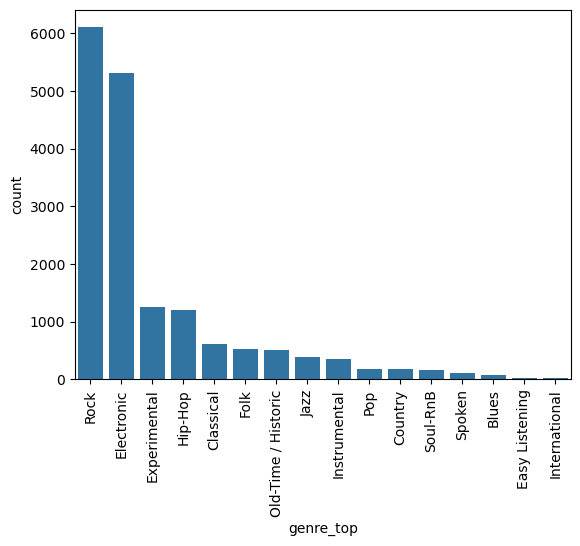

In [46]:
sns.barplot(tracks.genre_top.value_counts())
plt.xticks(rotation="vertical");

In [51]:
features = pd.read_csv(METADATA_DIR/"features.csv", index_col=0, skiprows=4, header=None)
features_header = pd.read_csv(METADATA_DIR/"features.csv", index_col=0, nrows=3, header=None)
features.columns = features_header.iloc[0] + "_" + features_header.iloc[1] + "_" + features_header.iloc[2].astype(str)
features.index.name = "track_id"
features.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,-0.804761,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [52]:
print("\n".join(features.columns))

chroma_cens_kurtosis_01
chroma_cens_kurtosis_02
chroma_cens_kurtosis_03
chroma_cens_kurtosis_04
chroma_cens_kurtosis_05
chroma_cens_kurtosis_06
chroma_cens_kurtosis_07
chroma_cens_kurtosis_08
chroma_cens_kurtosis_09
chroma_cens_kurtosis_10
chroma_cens_kurtosis_11
chroma_cens_kurtosis_12
chroma_cens_max_01
chroma_cens_max_02
chroma_cens_max_03
chroma_cens_max_04
chroma_cens_max_05
chroma_cens_max_06
chroma_cens_max_07
chroma_cens_max_08
chroma_cens_max_09
chroma_cens_max_10
chroma_cens_max_11
chroma_cens_max_12
chroma_cens_mean_01
chroma_cens_mean_02
chroma_cens_mean_03
chroma_cens_mean_04
chroma_cens_mean_05
chroma_cens_mean_06
chroma_cens_mean_07
chroma_cens_mean_08
chroma_cens_mean_09
chroma_cens_mean_10
chroma_cens_mean_11
chroma_cens_mean_12
chroma_cens_median_01
chroma_cens_median_02
chroma_cens_median_03
chroma_cens_median_04
chroma_cens_median_05
chroma_cens_median_06
chroma_cens_median_07
chroma_cens_median_08
chroma_cens_median_09
chroma_cens_median_10
chroma_cens_median_11
ch

In [53]:
tracks.columns

Index(['comments', 'date_created', 'date_released', 'engineer', 'favorites',
       'id', 'information', 'listens', 'producer', 'tags', 'title', 'tracks',
       'type', 'active_year_begin', 'active_year_end', 'associated_labels',
       'bio', 'comments', 'date_created', 'favorites', 'id', 'latitude',
       'location', 'longitude', 'members', 'name', 'related_projects', 'tags',
       'website', 'wikipedia_page', 'split', 'subset', 'bit_rate', 'comments',
       'composer', 'date_created', 'date_recorded', 'duration', 'favorites',
       'genre_top', 'genres', 'genres_all', 'information', 'interest',
       'language_code', 'license', 'listens', 'lyricist', 'number',
       'publisher', 'tags', 'title'],
      dtype='object')

In [54]:
tracks = tracks.merge(features, how="left", left_index=True, right_index=True)
train = tracks[tracks.split == "training"]
valid = tracks[tracks.split == "validation"]
test = tracks[tracks.split == "test"]
print(train.shape, valid.shape, test.shape)

(13522, 570) (1705, 570) (1773, 570)


In [56]:
from sklearn.preprocessing import LabelEncoder

label2idx = LabelEncoder()

X_train, X_valid, X_test = train[features.columns], valid[features.columns], test[features.columns]
y_train = label2idx.fit_transform(train["genre_top"])
y_valid, y_test = label2idx.transform(valid["genre_top"]), label2idx.transform(test["genre_top"])

print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)


(13522, 518) (1705, 518) (1773, 518)
(13522,) (1705,) (1773,)


In [57]:
pd.DataFrame({
    "class": label2idx.classes_,
    "index": label2idx.transform(label2idx.classes_)
})

,class,index
0,Blues,0
1,Classical,1
2,Country,2
3,Easy Listening,3
4,Electronic,4
5,Experimental,5
6,Folk,6
7,Hip-Hop,7
8,Instrumental,8
9,International,9


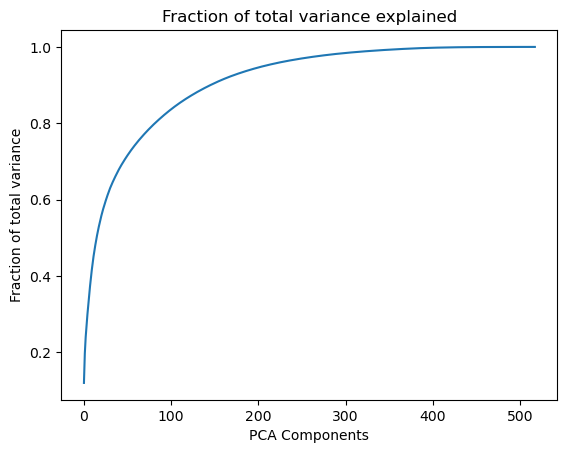

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA())
])
pca.fit(X_train)

sns.lineplot(pca.named_steps["pca"].explained_variance_ratio_.cumsum())
plt.title("Fraction of total variance explained")
plt.xlabel("PCA Components")
plt.ylabel("Fraction of total variance");

## Comparison of ML techniques

Techniques to consider:
1. Linear regression,
2. Lasso,
3. Ridge,
4. Partial least squares,
5. SVM with radial basis functions.
6. KNN,
7. XGBoost,
8. Random forests,
9. Small, fully connected ReLU networks.

In 2-6, the data will have to be normalized. We'll pick hyperparameters by grid search, using 5-fold stratified CV, and report scores on the validation set. Finally, though some of these algorithms implicitly perform feature selection, we can also do explicit feature selection, focusing on groups of features produced in specific ways. I'll end up recreating and generalizing Table 6 from [the dataset paper](https://arxiv.org/abs/1612.01840).


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

kf = StratifiedKFold(5, shuffle=True, random_state=97)

models = {
    # "Linear": SGDClassifier(loss="log_loss", penalty=None, 
    # make_pipeline(
    #     StandardScaler(),
    #     LogisticRegression(penalty=None, n_jobs=-1, max_iter=1000),
    # ),
    # "Lasso": make_pipeline(
    #     StandardScaler(),
    #     LogisticRegression(solver="saga", penalty="l1", n_jobs=-1),
    #     # GridSearchCV(LogisticRegression(solver="saga", penalty="l1"), param_grid={"C": 10.0**np.arange(-2, 4)}),
    # ),
    # "Ridge": make_pipeline(
    #     StandardScaler(),
    #     LogisticRegression(solver="saga", penalty="l2", n_jobs=-1),
    #     # GridSearchCV(LogisticRegression(solver="saga", penalty="l2"), param_grid={"C": 10.0**np.arange(-2, 4)}),
    # ),
    "ElasticNet": make_pipeline(
        StandardScaler(),
        LogisticRegression(solver="saga", penalty="elasticnet", l1_ratio=0.15, n_jobs=-1),
        # GridSearchCV(LogisticRegression(solver="saga", penalty="elasticnet"),
        #              param_grid={"C": 10.0**np.arange(-2, 4), "l1_ratio": [0.25, 0.5, 0.75]}),
    ),
    "PCR": make_pipeline(
        StandardScaler(),
        PCA(n_components=5),
        LogisticRegression(n_jobs=-1),
    ),
    "Linear SVM": make_pipeline(
        StandardScaler(),
        LinearSVC(),
    ),
    "Radial SVM": make_pipeline(
        StandardScaler(),
        Nystroem(),
        LinearSVC(),
    ),
    "KNN": make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(5),
    ),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,)),
    "XGBoost": XGBClassifier(),
}

feature_groups = [
    "all",
    "chroma",
    "tonnetz",
    "mfcc",
    "spectral_centroid",
    "spectral_bandwidth",
    "spectral_contrast",
    "spectral_rolloff",
    "rmse",
    "zcr",
    ["mfcc", "spectral_contrast"],
    ["mfcc", "spectral_contrast", "spectral_bandwidth"],
]

scores = pd.DataFrame(index=[str(x) for x in feature_groups], columns=models.keys())

for feats_name in feature_groups:
    for model_name, model in models.items():
        print(f"Model: {model_name}, features: {feats_name}")
        if feats_name == "all":
            feats = features.columns
        elif isinstance(feats, list):
            feats = [f for f in features.columns if any(f.startswith(s) for s in feats_name)]
        else:
            feats = [f for f in features.columns if f.startswith(feats_name)]
        X_train_feats, X_valid_feats = X_train[feats], X_valid[feats]
        model.fit(X_train_feats, y_train)
        y_pred = model.predict(X_valid_feats)
        scores.loc[str(feats_name), model_name] = accuracy_score(y_valid, y_pred)
scores


Model: ElasticNet, features: all
Model: PCR, features: all


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/daal4py/sklearn/linear_model/logistic_path.py:624: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn

Model: Linear SVM, features: all


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Radial SVM, features: all
Model: KNN, features: all
Model: MLP, features: all
Model: XGBoost, features: all
Model: ElasticNet, features: chroma


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model: PCR, features: chroma


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/daal4py/sklearn/linear_model/logistic_path.py:624: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Linear SVM, features: chroma


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Radial SVM, features: chroma
Model: KNN, features: chroma
Model: MLP, features: chroma
Model: XGBoost, features: chroma
Model: ElasticNet, features: ['mfcc', 'spectral_contrast', 'spectral_bandwidth']


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model: PCR, features: ['mfcc', 'spectral_contrast', 'spectral_bandwidth']


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/daal4py/sklearn/linear_model/logistic_path.py:624: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Linear SVM, features: ['mfcc', 'spectral_contrast', 'spectral_bandwidth']


/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Radial SVM, features: ['mfcc', 'spectral_contrast', 'spectral_bandwidth']
Model: KNN, features: ['mfcc', 'spectral_contrast', 'spectral_bandwidth']
Model: MLP, features: ['mfcc', 'spectral_contrast', 'spectral_bandwidth']
Model: XGBoost, features: ['mfcc', 'spectral_contrast', 'spectral_bandwidth']


,ElasticNet,PCR,Linear SVM,Radial SVM,KNN,MLP,XGBoost
all,0.731965,0.626979,0.704399,0.68915,0.657478,0.672727,0.73607
chroma,0.568328,0.602933,0.691496,0.692082,0.64868,0.686217,0.723754
"['mfcc', 'spectral_contrast', 'spectral_bandwidth']",0.722581,0.632258,0.71261,0.695015,0.686804,0.676246,0.734311


## Ensembling

In [16]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators=list(models.items()), final_estimator=LogisticRegression(), cv=kf)
stack.fit(X_train, y_train)
y_train_pred = stack.predict(X_train)
y_valid_pred = stack.predict(X_valid)
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Validation accuracy: {accuracy_score(y_valid, y_valid_pred):.3f}")

/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/daal4py/sklearn/linear_model/logistic_path.py:624: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pvk/miniconda3/envs/audiobot/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn

Training accuracy: 0.929
Validation accuracy: 0.751


<Axes: >

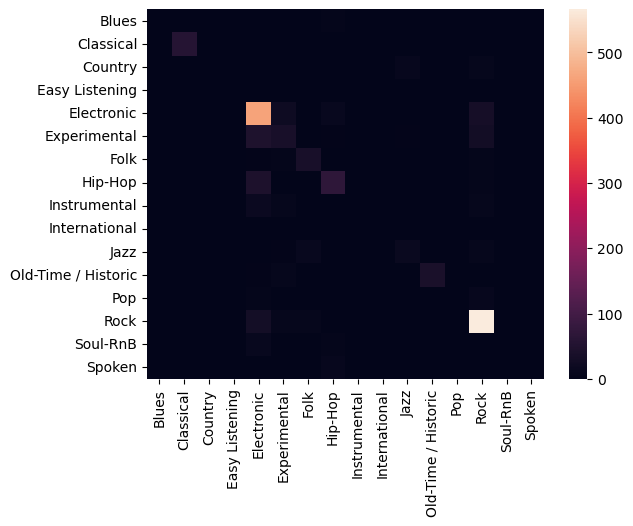

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = stack.predict(X_valid)

conf_mat = pd.DataFrame(
    confusion_matrix(y_valid, y_pred),
    columns=label2idx.classes_,
    index=label2idx.classes_
)
sns.heatmap(conf_mat)

In [33]:
conf_mat

,Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken
Blues,0,0,0,0,2,0,0,5,0,0,0,0,0,1,0,0
Classical,0,57,0,0,1,2,0,0,1,0,1,0,0,0,0,0
Country,0,0,0,0,0,0,1,0,0,0,9,0,0,8,0,0
Easy Listening,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
Electronic,0,1,0,0,461,20,1,13,2,0,1,0,0,33,0,0
Experimental,0,2,0,0,46,37,1,3,1,0,4,2,0,28,0,1
Folk,0,1,0,0,3,5,36,0,0,0,1,0,0,6,0,0
Hip-Hop,0,0,0,0,44,1,0,69,0,0,0,0,0,5,0,1
Instrumental,0,0,0,0,16,7,0,0,1,0,0,0,0,7,0,0
International,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
